Деректер өлшемі: (7043, 21)

Алғашқы 5 жол:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



=== Деректер туралы мәлімет (info) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Pa

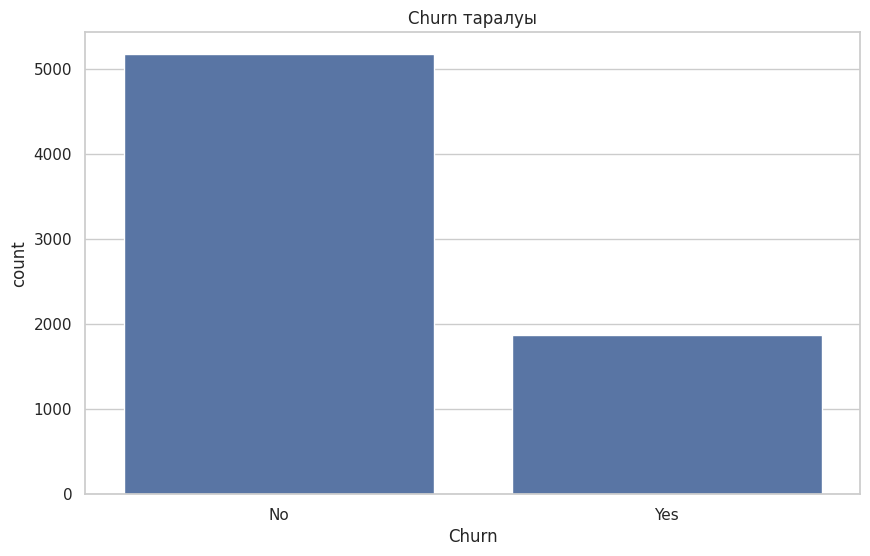

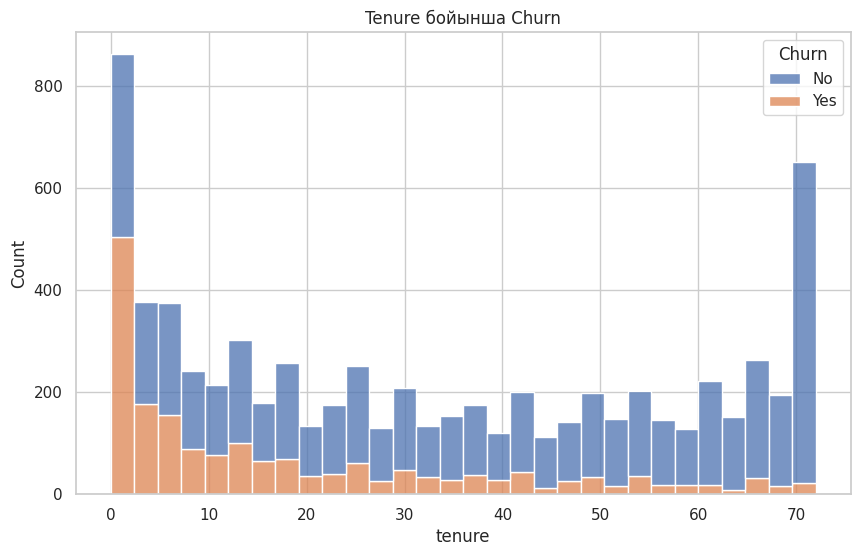

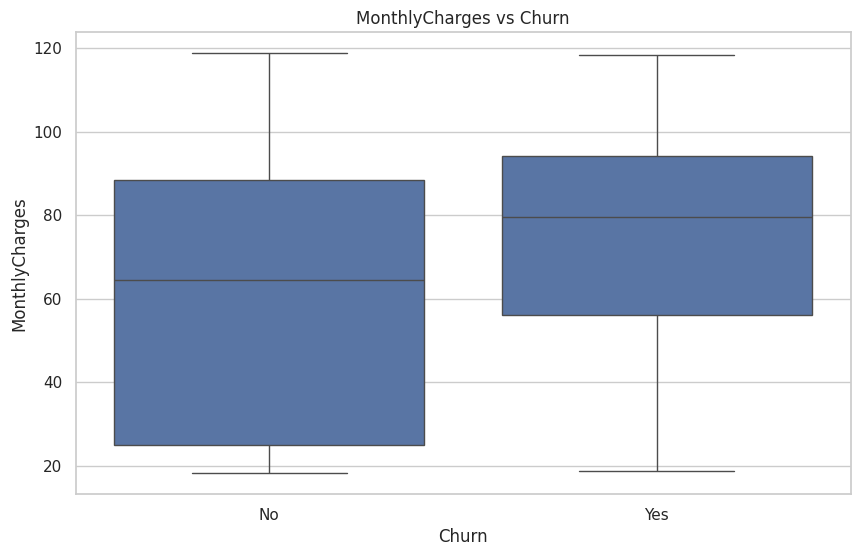

/tmp/ipython-input-1711445996.py:91: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipython-input-1711445996.py:98: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd


=== Бос мәндер тазартылғаннан кейін (NaN) ===
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Features өлшемі: (7043, 30)
Target өлшемі: (7043,)

Train өлшемі: (5634, 30)
Test өлшемі: (1409, 30)

=== Логистикалық регрессия нәтижелері ===
Accuracy: 0.8069552874378992

Confusion matrix:
[[925 110]
 [162 212]]

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0

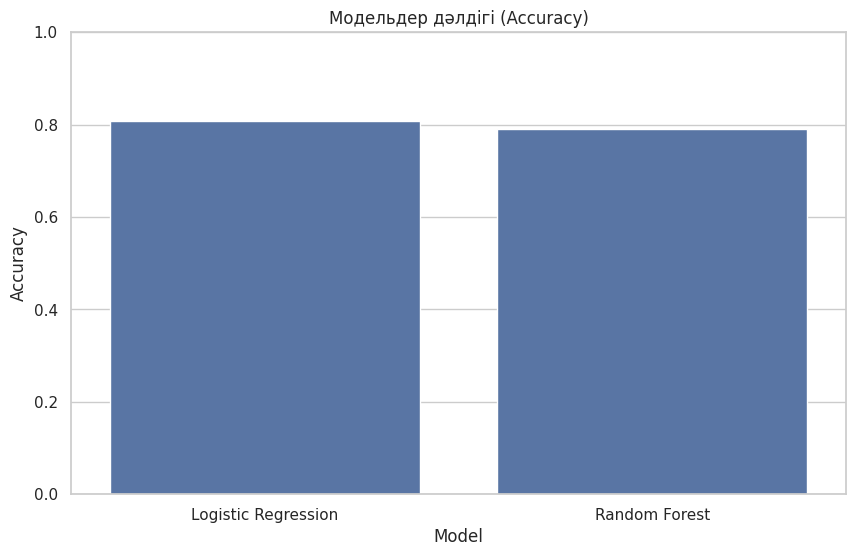

In [5]:
# ============================
# MIDTERM 1 — Churn Prediction
# Тақырып: Telco Customer Churn
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# --------------------------------------------------
# 1. Деректерді жүктеу
# --------------------------------------------------
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Деректер өлшемі:", df.shape)
print("\nАлғашқы 5 жол:")
display(df.head())

# --------------------------------------------------
# 2. Бастапқы шолу (info, missing values)
# --------------------------------------------------
print("\n=== Деректер туралы мәлімет (info) ===")
print(df.info())

print("\n=== Бос мәндер саны (NaN) ===")
print(df.isna().sum())

# TotalCharges бағанында пробел (' ') бар, сондықтан оны numeric-ке айналдырамыз
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

print("\nTotalCharges түрі өзгергеннен кейін info:")
print(df[["TotalCharges"]].info())

print("\nTotalCharges бойынша бос мәндер саны:")
print(df["TotalCharges"].isna().sum())

# --------------------------------------------------
# 3. EDA (қысқаша зерттеу)
# --------------------------------------------------

# Churn таралуы
print("\n=== Churn таралуы ===")
print(df["Churn"].value_counts())
print("\nChurn үлесі (%):")
print(df["Churn"].value_counts(normalize=True) * 100)

plt.figure()
sns.countplot(x="Churn", data=df)
plt.title("Churn таралуы")
plt.show()

# Тенюр бойынша Churn
plt.figure()
sns.histplot(data=df, x="tenure", hue="Churn", multiple="stack", bins=30)
plt.title("Tenure бойынша Churn")
plt.show()

# Айлық төлем (MonthlyCharges) бойынша Churn
plt.figure()
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("MonthlyCharges vs Churn")
plt.show()

# --------------------------------------------------
# 4. Бос мәндерді өңдеу (Data Cleaning)
# --------------------------------------------------

# 4.1 Сандық бағандардағы NaN -> медиана
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# customerID сандық емес, сондықтан алып тастаймыз
if "customerID" in numeric_cols:
    numeric_cols.remove("customerID")

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# 4.2 Санаттық (object) бағандардағы NaN -> mode (ең жиі мән)
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

for col in cat_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("\n=== Бос мәндер тазартылғаннан кейін (NaN) ===")
print(df.isna().sum())

# --------------------------------------------------
# 5. Target пен feature-лерді дайындау
# --------------------------------------------------

# Target: Churn (Yes/No -> 1/0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# ID бағанды алып тастаймыз
df.drop(columns=["customerID"], inplace=True)

# Features/Target бөлу
X = df.drop(columns=["Churn"])
y = df["Churn"]

# One-Hot Encoding барлық object бағандарға (drop_first=True)
X = pd.get_dummies(X, drop_first=True)

print("\nFeatures өлшемі:", X.shape)
print("Target өлшемі:", y.shape)

# --------------------------------------------------
# 6. Train/Test бөлу
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain өлшемі:", X_train.shape)
print("Test өлшемі:", X_test.shape)

# --------------------------------------------------
# 7. Масштабтау (Scaling) – Logistic Regression үшін
# --------------------------------------------------
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------------------------------
# 8. Модель 1 – Логистикалық регрессия
# --------------------------------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("\n=== Логистикалық регрессия нәтижелері ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification report:")
print(classification_report(y_test, y_pred_lr))

# --------------------------------------------------
# 9. Модель 2 – Random Forest (масштабтау қажет емес)
# --------------------------------------------------
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\n=== Random Forest нәтижелері ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification report:")
print(classification_report(y_test, y_pred_rf))

# --------------------------------------------------
# 10. Нәтижелерді салыстыру (шағын кесте)
# --------------------------------------------------
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
    ]
})

print("\n=== Модельдердің салыстырмасы ===")
print(results)

# Қалауыңша: бар график салуға болады
plt.figure()
sns.barplot(x="Model", y="Accuracy", data=results)
plt.ylim(0, 1)
plt.title("Модельдер дәлдігі (Accuracy)")
plt.show()
